In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('Sales.csv')

In [3]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [4]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [5]:
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

There is no null values and only date datatypes that needs to be modified.

because the column revenue supposed to be total bill and its not correct in this case so we need to drop and made new column 'Total price' = quantity * unit price

In [6]:
df['Date']= df['Date'].astype('datetime64')
date = df['Date'].dt
df['Day'] = date.day_name()
df['Month'] = date.month


In [7]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,Tuesday,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,Thursday,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,Sunday,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,Wednesday,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,Thursday,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [8]:
df.drop('Revenue', axis = 1, inplace = True)

In [9]:
df['Total price'] = df['Order_Quantity'] * df['Unit_Price']

In [10]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Total price
0,2013-11-26,Tuesday,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960
1,2015-11-26,Thursday,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960
2,2014-03-23,Sunday,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2760
3,2016-03-23,Wednesday,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2400
4,2014-05-15,Thursday,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,480


There is unmatched calcualtion on the profit columns so I assume that it has a discounted because it supposed to be :
example : quantity = 8 , unit_cost = 45, unit_price = 120. 
Total price = 960
Total cost = 360
Profit supposed to be = 960-360 = 600
but in the data it is stated that profit = 590
So I assume that there is additional cost for sellers that made the profit drop by $10

In [11]:
df['Profit Margin Percentage'] = round(((df['Profit'])/df['Cost'] * 100),2)
df['Additional Cost'] =  (df['Total price'] - df['Cost']) - df['Profit']
df['Percentage of profit dropped'] = round((df['Additional Cost'] / (df['Total price'] - df['Cost']) * 100), 2)
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Total price,Profit Margin Percentage,Additional Cost,Percentage of profit dropped
0,2013-11-26,Tuesday,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,960,163.89,10,1.67
1,2015-11-26,Thursday,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,960,163.89,10,1.67
2,2014-03-23,Sunday,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2760,131.98,359,20.81
3,2016-03-23,Wednesday,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2400,132.00,312,20.80
4,2014-05-15,Thursday,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,480,132.22,62,20.67


In [12]:
outliers = []
def outlier_check(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [13]:
outliers = []
len(outlier_check(df['Profit']))

10021

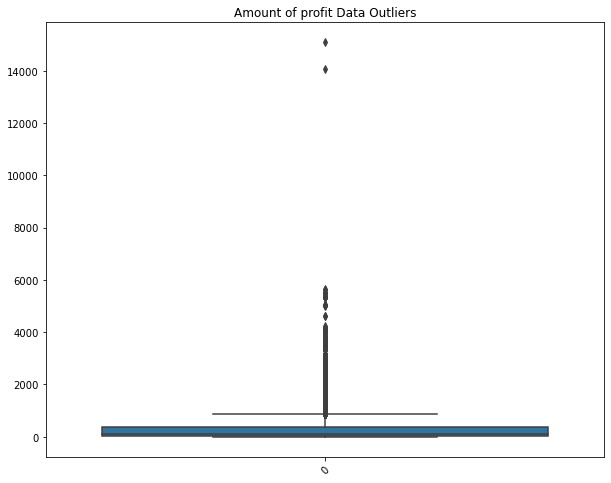

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df['Profit'])
plt.title("Amount of profit Data Outliers")
plt.xticks(rotation=45)
plt.show()

In [15]:
df_outlierprofit = df[df['Profit'].isin(outliers)]
df_outlierprofit[['Product_Category', 'Order_Quantity']].groupby('Product_Category').agg('sum').sort_values('Order_Quantity', ascending = False)


,Order_Quantity
Product_Category,
Bikes,15875
Clothing,15604
Accessories,4791


In [57]:
#lets see 
df[df['Profit'] > 10000]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Total price,Profit Margin Percentage,Additional Cost,Percentage of profit dropped,Pre/Post 2012
112072,2013-07-24,Wednesday,7,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,...,27,1482,2384,14055,40014,64368,35.13,10299,42.29,Pre 2012
112073,2015-07-24,Friday,7,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2384,15096,42978,69136,35.12,11062,42.29,Pre 2012


The cost of the clothes is 1482, does the employee mis-input the data?

In [58]:
df[df['Product'] ==  'Touring-1000 Yellow, 50']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Total price,Profit Margin Percentage,Additional Cost,Percentage of profit dropped,Pre/Post 2012
108374,2013-10-11,Friday,10,2013,31,Young Adults (25-34),M,Australia,Queensland,Bikes,...,1,1482,2384,521,1482,2384,35.16,381,42.24,Pre 2012
108375,2015-10-11,Sunday,10,2015,31,Young Adults (25-34),M,Australia,Queensland,Bikes,...,1,1482,2384,521,1482,2384,35.16,381,42.24,Pre 2012
108376,2013-11-04,Monday,11,2013,31,Young Adults (25-34),M,Australia,Queensland,Bikes,...,1,1482,2384,521,1482,2384,35.16,381,42.24,Pre 2012
108377,2015-11-04,Wednesday,11,2015,31,Young Adults (25-34),M,Australia,Queensland,Bikes,...,1,1482,2384,521,1482,2384,35.16,381,42.24,Pre 2012
108378,2014-06-22,Sunday,6,2014,31,Young Adults (25-34),M,Australia,Queensland,Bikes,...,1,1482,2384,521,1482,2384,35.16,381,42.24,Pre 2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112021,2016-02-14,Sunday,2,2016,31,Young Adults (25-34),M,Germany,Nordrhein-Westfalen,Bikes,...,1,1482,2384,592,1482,2384,39.95,310,34.37,Pre 2012
112022,2014-05-03,Saturday,5,2014,31,Young Adults (25-34),M,Germany,Nordrhein-Westfalen,Bikes,...,1,1482,2384,592,1482,2384,39.95,310,34.37,Pre 2012
112023,2016-05-03,Tuesday,5,2016,31,Young Adults (25-34),M,Germany,Nordrhein-Westfalen,Bikes,...,3,1482,2384,1776,4446,7152,39.95,930,34.37,Pre 2012
112072,2013-07-24,Wednesday,7,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,...,27,1482,2384,14055,40014,64368,35.13,10299,42.29,Pre 2012


So its not an outlier that we need to drop

- Bikes are the most profitable based on the outliers

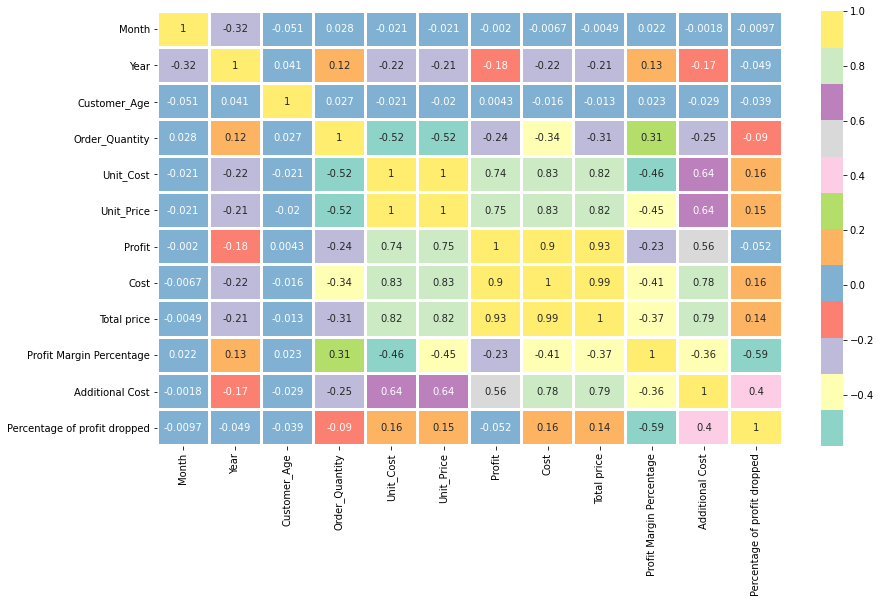

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap='Set3', linewidth=2)
plt.show()

Correlation analysis
The number represent the correlation for each numeric column, if the value of correlation is close to 1 it means that it has positive correlation and strong correlation (as the x value in increase, y value also increase). If the value is close to 0 it means it has weak relationship. And if it has negative value it represents that it has negative correlation (as the x value decrease, y value also decrease).
For the column cost and price it does correlates each other because it is based on the equation of both of them.
There were several intersting facts based on the correlation analysis such as additional cost per year, additional cost vs unit price which will be later discussed on this notebooks.

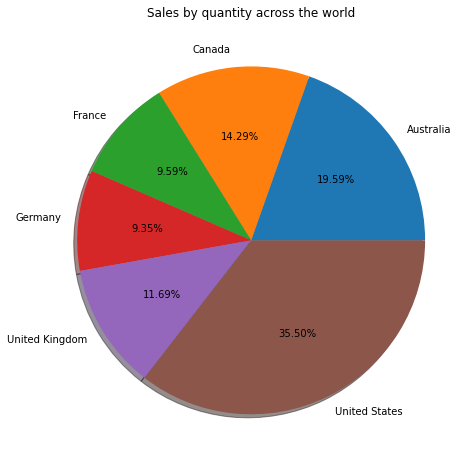

In [17]:
#MARKET SHARE
share = df[['Country', 'Order_Quantity']].groupby('Country').agg('sum').reset_index()
share
share2 = []
for i in share['Order_Quantity']:
    share2.append(i)
label = ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']
plt.figure(figsize=(10,8))
plt.pie(share2, labels=label,
       shadow=True,
       textprops={
           'size' : 10,
           'color' : 'black'
       },
        autopct = '%1.2f%%',
       )
plt.title('Sales by quantity across the world')
plt.show()

In [18]:
df[['Order_Quantity', 'State']].groupby('State').sum().sort_values('Order_Quantity', ascending = False)

,Order_Quantity
State,
California,269759
British Columbia,191556
England,157218
Washington,137947
New South Wales,115932
Oregon,67012
Victoria,66231
Queensland,57592
Saarland,31084


- california is the state that sold the most product
- massachusetts is the state that sold the least product

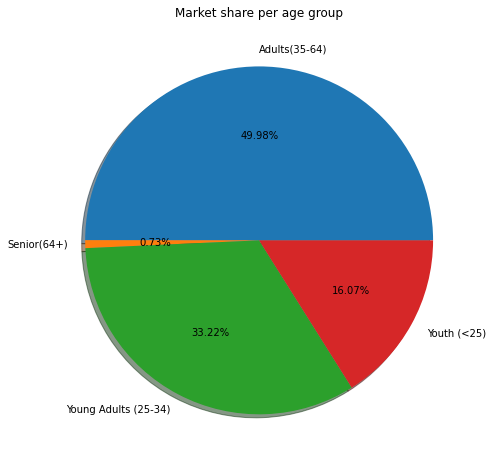

In [19]:
age = df[['Age_Group', 'Order_Quantity']].groupby('Age_Group').agg('sum').reset_index()
age
age22 = []
for i in age['Order_Quantity']:
    age22.append(i)
label = ['Adults(35-64)', 'Senior(64+)', 'Young Adults (25-34)', 'Youth (<25)']
plt.figure(figsize=(10,8))
plt.pie(age22, labels=label,
       shadow=True,
       textprops={
           'size' : 10,
           'color' : 'black'
       },
        autopct = '%1.2f%%',
       )
plt.title('Market share per age group')
plt.show()

- Adults has the highest quantity of sales
- Senior has the least quantity of sales

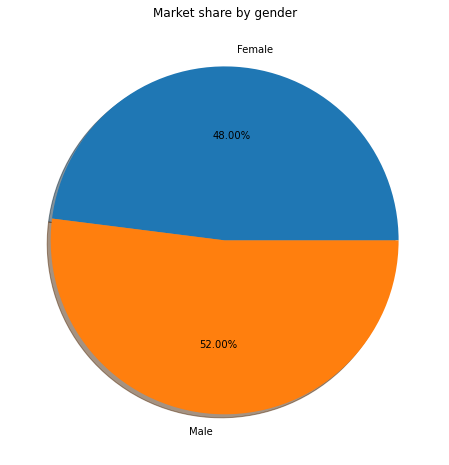

In [20]:
gender = df[['Customer_Gender', 'Order_Quantity']].groupby('Customer_Gender').agg('sum').reset_index()
gender1= []

for i in gender['Order_Quantity']:
    gender1.append(i)
label = ['Female', 'Male']
plt.figure(figsize=(10,8))
plt.pie(gender1, labels=label,
       shadow=True,
       textprops={
           'size' : 10,
           'color' : 'black'
       },
        autopct = '%1.2f%%',
       )
plt.title('Market share by gender')
plt.show()

- Male has higher quantity of sales than female 

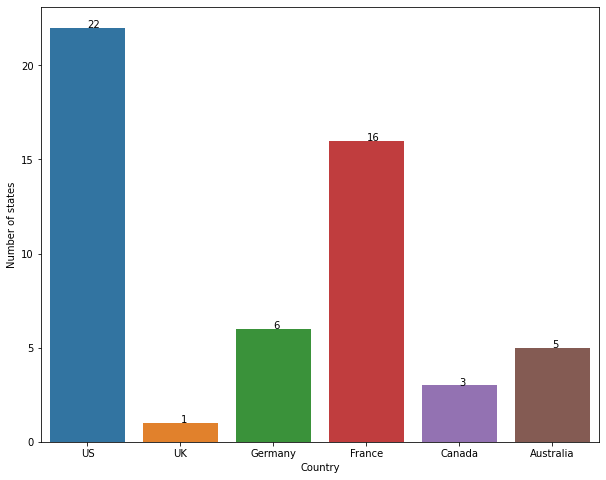

In [59]:
# Number of stores
america = len(df[df['Country'] == 'United States']['State'].unique())
uk = len(df[df['Country'] == 'United Kingdom']['State'].unique())
germany = len(df[df['Country'] == 'Germany']['State'].unique())
france = len(df[df['Country'] == 'France']['State'].unique())
canada = len(df[df['Country'] == 'Canada']['State'].unique())
aust = len(df[df['Country'] == 'Australia']['State'].unique())
lis = [america, uk, germany, france, canada, aust]
dicta = {'Number of states': lis}
df_numb= pd.DataFrame(dicta, index = ['US', 'UK', 'Germany', 'France', 'Canada', 'Australia'])
df_numb = df_numb.reset_index()
plt.figure(figsize = (10,8))
sns.barplot(x = df_numb['index'], y = df_numb['Number of states'])
for index, value in enumerate(df_numb['Number of states']):
    plt.text(index, value, str(value))
plt.xlabel('Country')
plt.show()


US with 22 store that located in different states contributed to its sales which dominated the market share in the world for the bike store. But if we look at UK, it only has 1 store and its contributed 11% of bike store sales across the world. 
How do we know the performance of each store in each state? does us with 22 stores in it all of them has great performance in terms of sales?

In [22]:
tes = df[['Country','State', 'Order_Quantity']].groupby(['Country', 'State']).agg('sum').reset_index()
tes2 = tes[tes['Country']== 'United States']
tes2

,Country,State,Order_Quantity
31,United States,Alabama,105
32,United States,Arizona,7
33,United States,California,269759
34,United States,Florida,125
35,United States,Georgia,112
36,United States,Illinois,299
37,United States,Kentucky,130
38,United States,Massachusetts,2
39,United States,Minnesota,131
40,United States,Mississippi,91


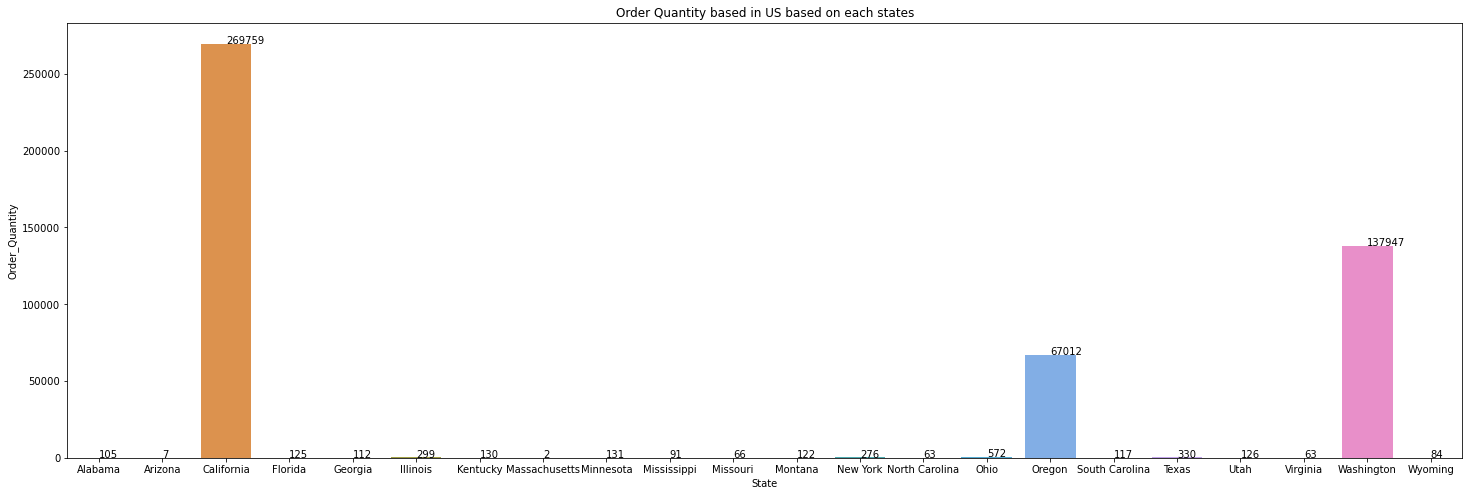

In [23]:
plt.figure(figsize = (25,8))
sns.barplot(x= tes2['State'], y = tes2['Order_Quantity'])
plt.title('Order Quantity based in US based on each states')
for index, value in enumerate(tes2['Order_Quantity']):
    plt.text(index, value, str(value))
plt.show()

California, washington, and oregon are the top 3 store that contributed to US sales, if we look at another states beside the TOP 3 there are very small amount of quantity ordered from each of the states. This indicates that the sales is not well distributed between each store. Lets look at the detail

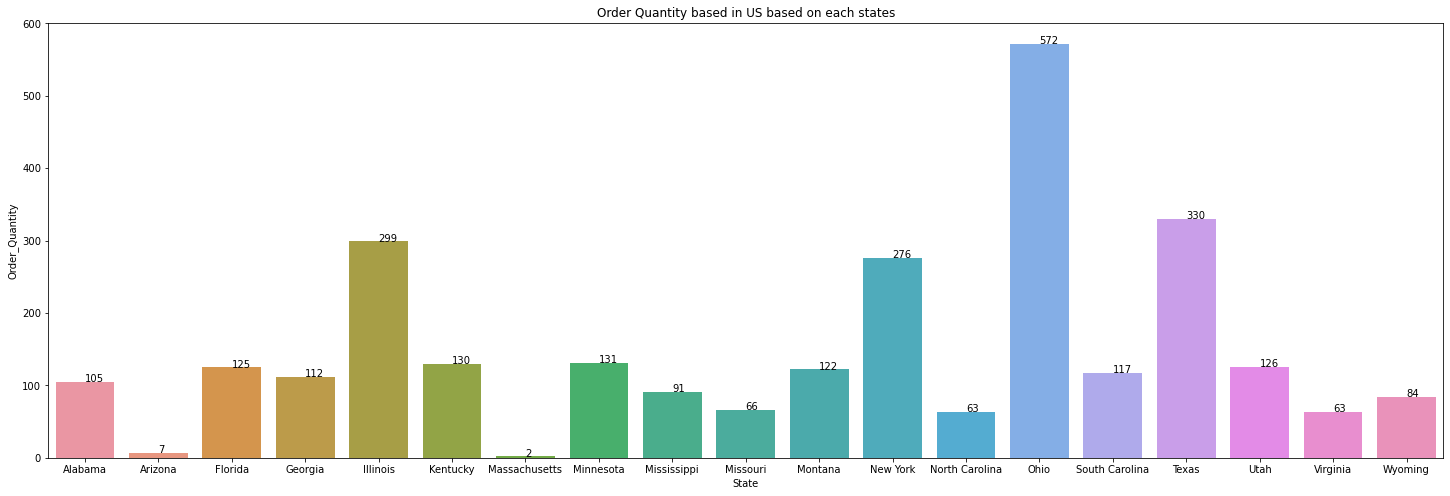

In [24]:
tes3= tes2[tes2['Order_Quantity'] < 1000]
plt.figure(figsize = (25,8))
sns.barplot(x= tes3['State'], y = tes3['Order_Quantity'])
plt.title('Order Quantity based in US based on each states')
for index, value in enumerate(tes3['Order_Quantity']):
    plt.text(index, value, str(value))
plt.show()


The plot shows us that the order quantity is very low if we compare it to the top 3. The store needs to make decision whether the store needs to be closed or needs to be improve. Does closing the store it leads to bigger profit for the company?
Every month the store needs to pay operational cost, we need to check the profit made by each store for this time range.

In [25]:
per_year = df[['Year', 'Profit']].groupby('Year').agg('sum').reset_index()


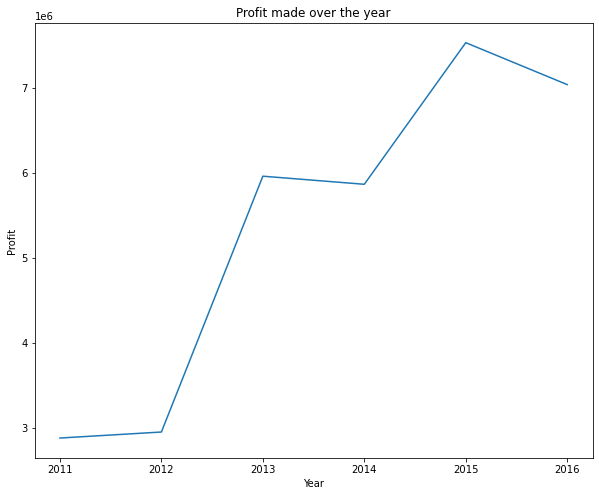

In [26]:
plt.figure(figsize= (10,8))
sns.lineplot(x = per_year['Year'], y = per_year['Profit'])
plt.title('Profit made over the year')
plt.show()

The graphs tells us that the company is in a good position because almost every year the profit is in uptrend. According to statista in the number of cyclist in us has increased from 43.5 million to 47 million the last three years (from 2014 to 2017) , lets find out about our store policy making on profit margin percentage over the year. 

In [27]:
pmp = df[['Profit Margin Percentage', 'Year']].groupby('Year').mean().reset_index()

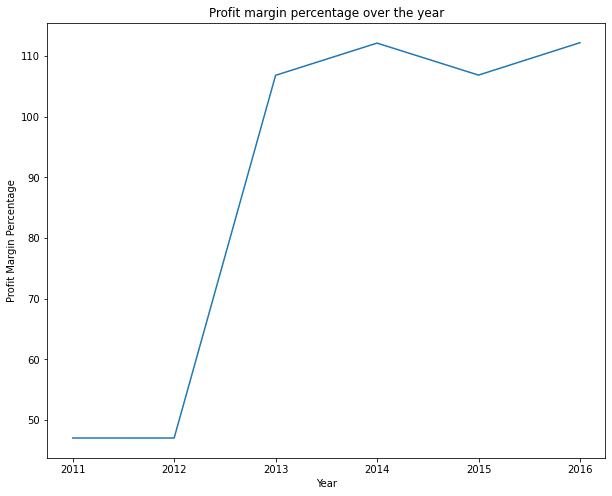

In [28]:
plt.figure(figsize= (10,8))
sns.lineplot(x = pmp['Year'], y = pmp['Profit Margin Percentage'])
plt.title('Profit margin percentage over the year')
plt.show()

The lineplot tells us that the increase in profit is due to the company's policy to change the profit margin percentage from 47% to around 100-110%, does this policy decrease the product sold over the year?

In [29]:
pds = df[['Order_Quantity', 'Year']].groupby('Year').sum().reset_index()
pds

,Year,Order_Quantity
0,2011,5260
1,2012,5354
2,2013,294787
3,2014,379585
4,2015,289517
5,2016,370813


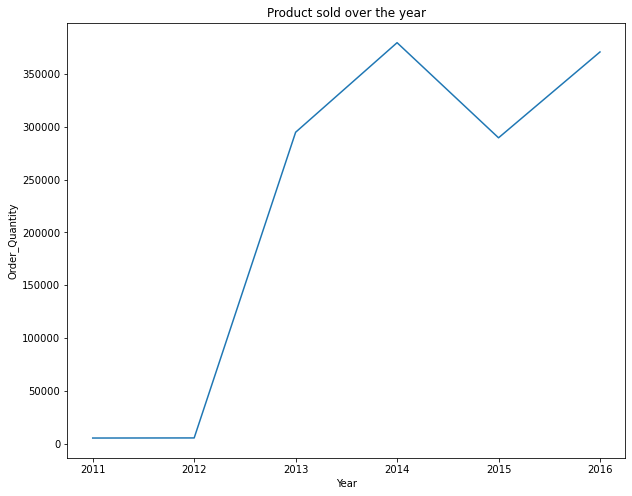

In [30]:
plt.figure(figsize= (10,8))
sns.lineplot(x = pds['Year'], y = pds['Order_Quantity'])
plt.title('Product sold over the year')
plt.show()

This lineplot tells us that increasing the profit margin percentage does not affect the number of product sold over the year.
there is some possibilities:
- Data is missing data in 2011 and 2012
- There is demand increase post 2012
- The company open new stores in different location
- The company increase its unit price

Lets assume that there were no missing data in 2011 and 2012

<AxesSubplot:xlabel='Year', ylabel='Unit_Price'>

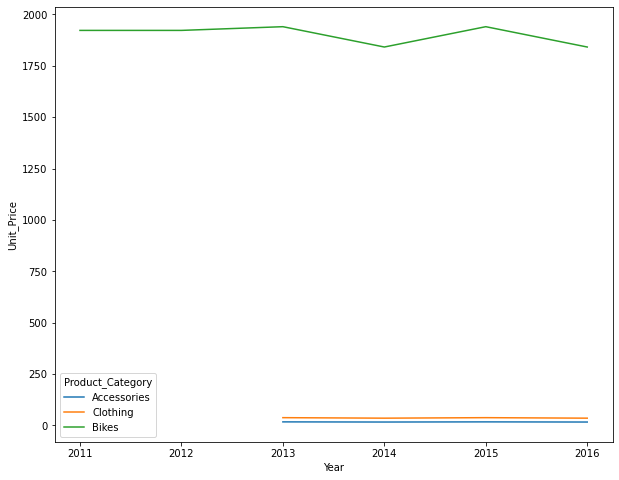

In [67]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df['Year'], y = df['Unit_Price'],hue = df['Product_Category'], estimator = np.mean, ci = None)

The company maintain its product price over the year

In [31]:
allstore = []
for i in df['State'].unique():
    allstore.append(i)


In [32]:
store_2012 = []
for i in df[(df['Year'] == 2012)]['State'].unique():
    store_2012.append(i)
store_2012

['Victoria',
 'New South Wales',
 'California',
 'Washington',
 'Oregon',
 'Nordrhein-Westfalen',
 'Bayern',
 'Hamburg',
 'Tasmania',
 'Saarland',
 'Brandenburg',
 'British Columbia',
 'Hessen',
 'Queensland',
 'South Australia',
 'England',
 'Seine (Paris)',
 'Essonne',
 'Hauts de Seine',
 'Seine Saint Denis',
 'Seine et Marne',
 'Val de Marne',
 'Nord',
 'Yveline',
 'Loiret',
 'Charente-Maritime',
 'Moselle',
 'Somme',
 'Wyoming',
 "Val d'Oise",
 'Garonne (Haute)',
 'Loir et Cher',
 'Pas de Calais',
 'Georgia',
 'Texas',
 'Alberta']

In [33]:
store_2013 = []
for i in df[(df['Year'] == 2013)]['State'].unique():
    store_2013.append(i)
store_2013

['British Columbia',
 'Victoria',
 'Oregon',
 'California',
 'Saarland',
 'Seine Saint Denis',
 'Moselle',
 'Queensland',
 'England',
 'Nord',
 'Washington',
 'Hessen',
 'Nordrhein-Westfalen',
 'Kentucky',
 'Seine (Paris)',
 'Loiret',
 'Alberta',
 'New South Wales',
 'Bayern',
 'Hamburg',
 'Yveline',
 'South Australia',
 'Essonne',
 "Val d'Oise",
 'Tasmania',
 'Hauts de Seine',
 'Val de Marne',
 'Pas de Calais',
 'Charente-Maritime',
 'Seine et Marne',
 'Loir et Cher',
 'Brandenburg',
 'Garonne (Haute)',
 'Illinois',
 'Texas',
 'Somme',
 'North Carolina',
 'Georgia',
 'Ontario',
 'Missouri',
 'Ohio',
 'Montana',
 'New York',
 'Utah',
 'Wyoming',
 'Florida',
 'Massachusetts',
 'Arizona',
 'Alabama']

In [34]:
new_store = []
for i in store_2013:
    if i not in store_2012:
        new_store.append(i)
new_store

['Kentucky',
 'Illinois',
 'North Carolina',
 'Ontario',
 'Missouri',
 'Ohio',
 'Montana',
 'New York',
 'Utah',
 'Florida',
 'Massachusetts',
 'Arizona',
 'Alabama']

In [35]:
stored_data = []
for i in df['State']:
    stored_data.append(i)
post_pre = []
for i in stored_data:
    if i in new_store:
        post_pre.append('Post 2012')
    else:
        post_pre.append('Pre 2012')

In [36]:
df['Pre/Post 2012'] = post_pre

Pre 2012 means the store is opened before 2012, and post 2012 the store is open after 2012 (newer store)

In [37]:
df[['Pre/Post 2012', 'Order_Quantity']].groupby('Pre/Post 2012').agg('sum').reset_index()

,Pre/Post 2012,Order_Quantity
0,Post 2012,2009
1,Pre 2012,1343307


Before 2013 the company has 36 store across the world. After 2012 the company have 49 store accross the world. But the problem is that the newer store does not contribute that much to the company sales. The store that has higher contribution in the company sales is the older store('post 2012'). Assuming there were no missing data on 2011 and 2012, the demand for bike and its accessories increasing significantly from 2012 to 2013.

In [38]:
#additional cost
ad = df[['Additional Cost', 'Year']].groupby('Year').agg('mean').reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

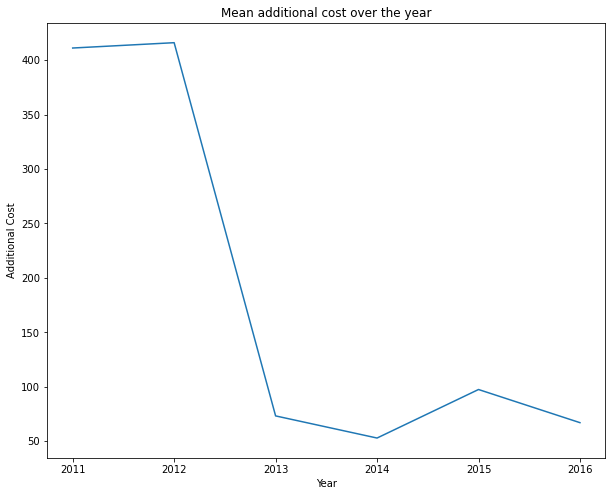

In [39]:
plt.figure(figsize = (10,8))
sns.lineplot(x= df['Year'],y=df['Additional Cost'], ci= None)
plt.title('Mean additional cost over the year')
plt.show


Over the year, the additional cost decreased significantly especially from 2012 to 2013, the company managed to suppress 75%-85% of its additional cost for its item.

In [40]:
df[['Additional Cost', 'Profit Margin Percentage']].corr()

,Additional Cost,Profit Margin Percentage
Additional Cost,1.000000,-0.362762
Profit Margin Percentage,-0.362762,1.000000


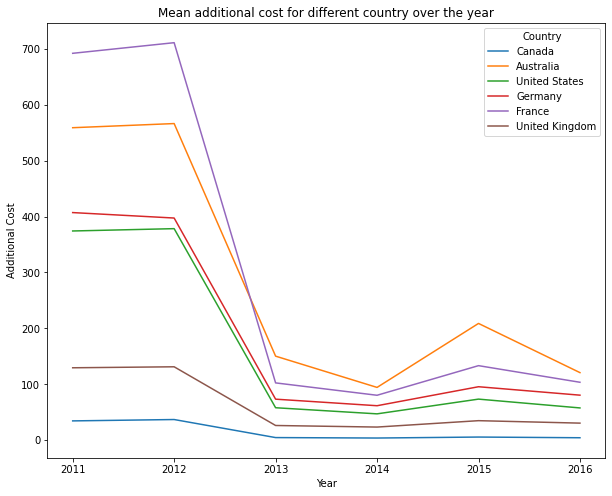

In [41]:
plt.figure(figsize = (10,8))
sns.lineplot(x= df['Year'],y=df['Additional Cost'],hue=df['Country'],ci=None,estimator=np.mean)
plt.title('Mean additional cost for different country over the year')
plt.show()

Additional cost for each country varies, it depends on shipping cost, shipping & tax policy for each country. Each country's additional cost dropped significantly on 2013 except canada and UK which has more gentle curve than the other. In 2013 to 2016 they have the same order from the highest to the lowest which are:
- Australia
- France
- Germany
- United States
- UK
- Canada

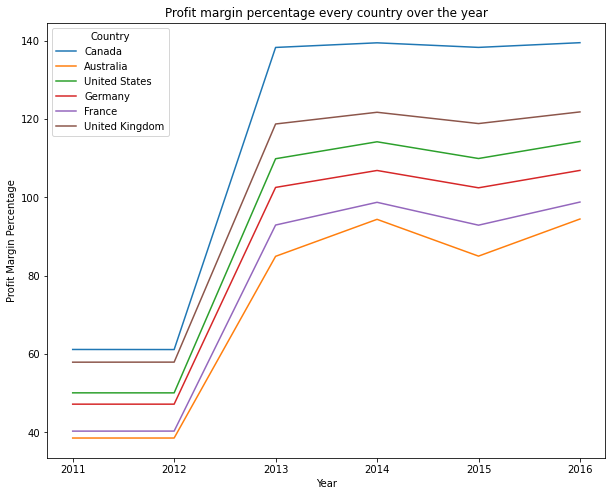

In [68]:
plt.figure(figsize = (10,8))
sns.lineplot(x= df['Year'],y=df['Profit Margin Percentage'],hue=df['Country'],ci=None,estimator=np.mean)
plt.title('Profit margin percentage every country over the year')
plt.show()

Yes, additional cost does affecting profit margin percentage because based on the graph the line is almost similar with the additional cost for different country per year. What is the correlation between additional cost to profit margin percentage?

The correlation between them is -0.36 -> negative correlation
it means that the higher the additional cost, it will resulted to lower profit margin percentage, but it is weak correlation because the value is close to 0 than to 1. There are other factor that considered by the store to decide the profit margin percentage.

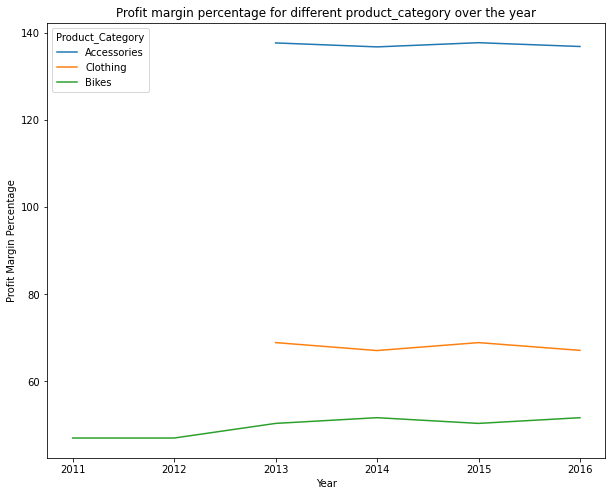

In [44]:
# Category with the highest profit margin percentage
plt.figure(figsize = (10,8))
sns.lineplot(x= df['Year'],y=df['Profit Margin Percentage'],hue=df['Product_Category'],ci=None,estimator=np.mean)
plt.title('Profit margin percentage for different product_category over the year')
plt.show()

It seems like they just added new product on 2013 which are accessories and clothing, before 2013 they only sell bikes. Lets see how the new product add profit for the company. Does bike with lowest profit margin percentage give the least profit for the company?

<AxesSubplot:xlabel='Year', ylabel='Profit'>

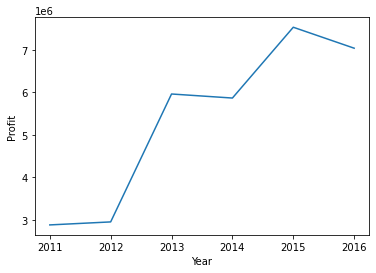

In [72]:
propit = df[['Year', 'Profit']].groupby('Year').sum().reset_index()
sns.lineplot(x = propit['Year'], y = propit['Profit'])

In [46]:
gained = (propit['Profit'][2] - propit['Profit'][1])/propit['Profit'][1]*100
print(f'after adding new product category, the profit increase {gained}%')

after adding new product category, the profit increase 101.87066839250636%


In [69]:
j = df[(df['Year']== 2013)]

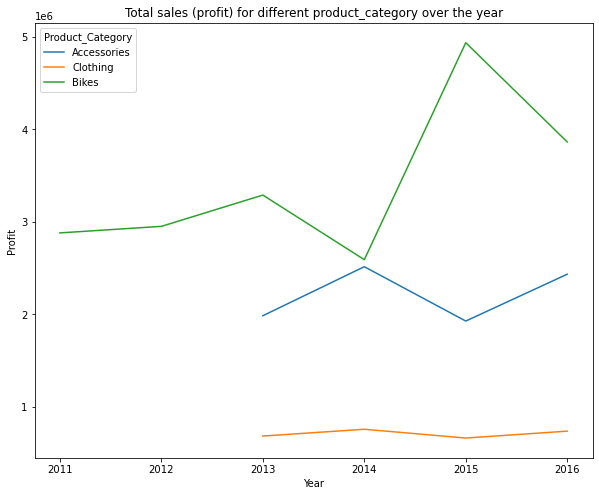

In [74]:
plt.figure(figsize = (10,8))
sns.lineplot(x= df['Year'],y=df['Profit'],hue=df['Product_Category'],ci=None,estimator=np.sum)
plt.title('Total sales (profit) for different product_category over the year')
plt.show()

despite having the lowest profit margin percentage for bikes category it gave the most profit for the company. As we know accessories has the highest profit margin percentage ranked number 2 on total profit for the company.

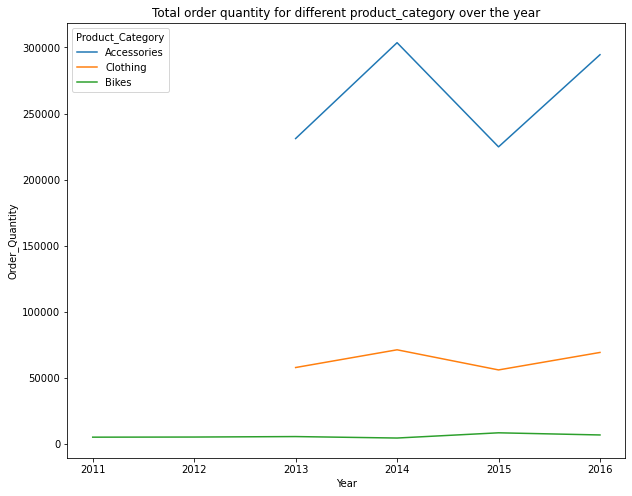

In [75]:
plt.figure(figsize = (10,8))
sns.lineplot(x= df['Year'],y=df['Order_Quantity'],hue=df['Product_Category'],ci=None,estimator=np.sum)
plt.title('Total order quantity for different product_category over the year')
plt.show()

If we see it from profit margin percentage perspective over the year, it different from year to year because of additional cost and other factors. If we want to see the sales based on product category like the graphh above it tells us that the bikes sales over the year doesnt change that much or in a constant trend. The product line that boosting the sales for the company is from accessories and clothing, both of these category are a good decision taken by the company.

- Accessories sells the most product by quantity
- Bikes sells the least product by quantity

On the other hand, the company needs to take improvement on the BIKES product category so that it could more produce profit


hypothesis  : 
- demand increasing over the year that contributes to the growth of company sales = FALSE
- The company open new stores post 2012  = True but it does not contributes to the growth of sales

Lets see the bikes product category data


In [76]:
bikes = df[(df['Product_Category'] == 'Bikes')]
bike_prop = bikes[['Sub_Category', 'Order_Quantity']].groupby('Sub_Category').agg('sum').reset_index()
bike_prop

,Sub_Category,Order_Quantity
0,Mountain Bikes,11992
1,Road Bikes,19771
2,Touring Bikes,4648


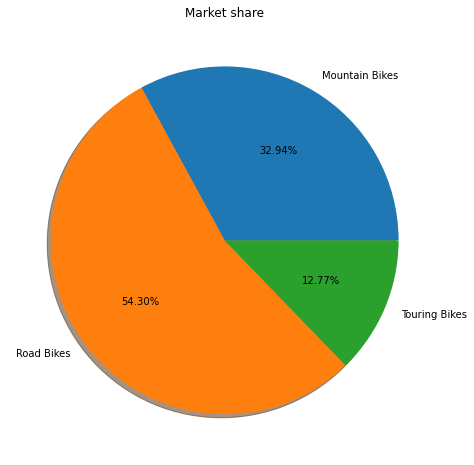

In [77]:

share_bikes = []
for i in bike_prop['Order_Quantity']:
    share_bikes.append(i)
label = ['Mountain Bikes', 'Road Bikes', 'Touring Bikes']
plt.figure(figsize=(10,8))
plt.pie(share_bikes, labels=label,
       shadow=True,
       textprops={
           'size' : 10,
           'color' : 'black'
       },
        autopct = '%1.2f%%',
       )
plt.title('Market share')
plt.show()

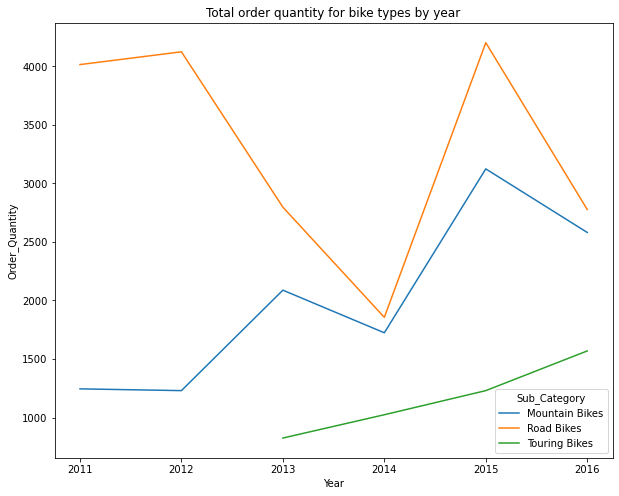

In [78]:
plt.figure(figsize = (10,8))
sns.lineplot(x= bikes['Year'],y=bikes['Order_Quantity'],hue=bikes['Sub_Category'],ci=None,estimator=np.sum)
plt.title('Total order quantity for bike types by year')
plt.show()

From the graph tells us that for every types of bikes there were fluctuation. The most sold product is the mountain bikes, followed by road bikes. Touring bikes were added to the store on 2013. 
- Mountain bikes sales is on uptrend
- Touring bikes sales is on uptrend
- Road bikes sales is fluctuating but roadbikes is the highest number of bikes that sold.

In [79]:
#USA trend

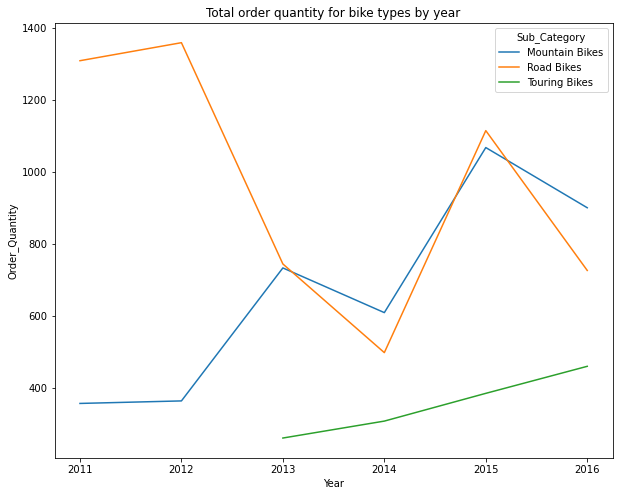

In [80]:
usa_bike = df[(df['Product_Category'] == 'Bikes') & (df['Country'] == 'United States')]
plt.figure(figsize = (10,8))
sns.lineplot(x= usa_bike['Year'],y=usa_bike['Order_Quantity'],hue=usa_bike['Sub_Category'],ci=None,estimator=np.sum)
plt.title('Total order quantity for bike types by year')
plt.show()

In [81]:
#USA customer behavior
usa_only = df[df['Country'] == 'United States']
zz = round((usa_only[['Customer_Gender', 'Total price']].groupby('Customer_Gender').mean()),2).reset_index()
zz

,Customer_Gender,Total price
0,F,781.01
1,M,790.60


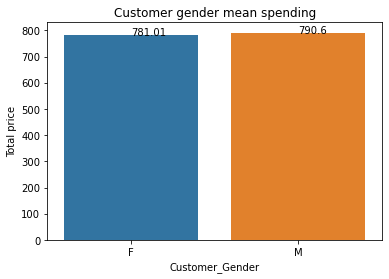

In [82]:
sns.barplot(x = zz['Customer_Gender'], y= zz['Total price'])
for index, value in enumerate(zz['Total price']):
    plt.text(index, value, str(value))
plt.title('Customer gender mean spending')
plt.show()

Male spends more than female in the US bike shop

In [83]:
#transaction per month
trans_m= usa_only[['Month', 'Date']].groupby('Month').agg('count').reset_index()
trans_m.columns = ['Month', 'Sum of transaction']
trans_m


,Month,Sum of transaction
0,1,3126
1,2,2996
2,3,3260
3,4,3424
4,5,4056
5,6,3802
6,7,2570
7,8,2934
8,9,2718
9,10,3104


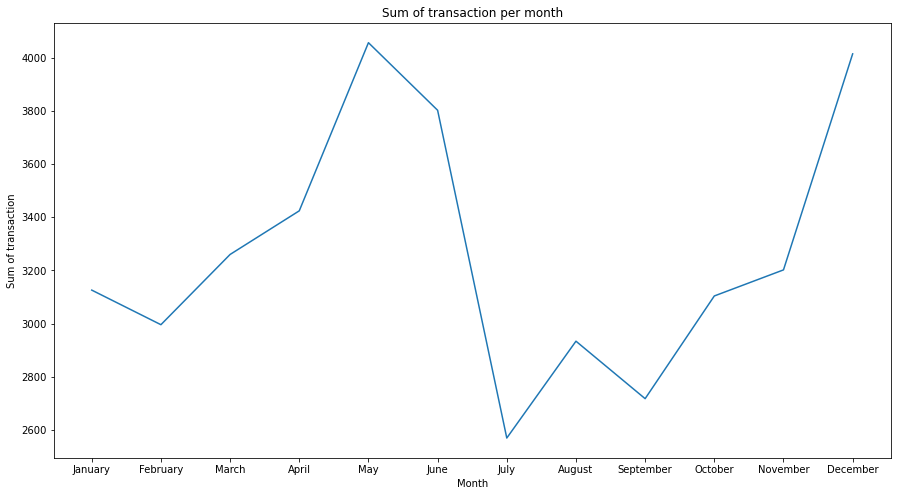

In [84]:
plt.figure(figsize = (15,8))
sns.lineplot(x= trans_m['Month'],y=trans_m['Sum of transaction'])
plt.title('Sum of transaction per month')
plt.xticks(np.arange(1,13), labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )

plt.show()

- May and December are the peak month for US bike store -> summer holiday and winter holiday

In [ ]:
trans_day = usa_only[['Day', 'Date']].groupby('Day').agg('count').reset_index()
trans_day.columns = ['Day', 'Sum of transaction']
trans_day

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = trans_day['Day'], y = trans_day['Sum of transaction'])
plt.title('Transaction by day')
plt.show()

# Conclusion
- United states has the highest sales by quantity across the world
- France has the lowest sales by quantity across the world
- california is the state that sold the most product
- massachusetts is the state that sold the least product -> only 2 product sold over the year -> needs improvement
- Adults has the highest quantity of sales
- Senior has the least quantity of sales
- Male has higher quantity of sales than female, the differences is only 4% -> insignificant
- US with 22 store that located in different states contributed to its sales which dominated the market share in the world for the bike store. But if we look at UK, it only has 1 store and its contributed 11% of bike store sales across the world.
- the order quantity is very low if we compare it to the top 3. The store needs to make decision whether the store needs to be closed or needs to be improved.

- that the company is in a good position because almost every year the profit is in uptrend except 2015 to 2016 -> needs improvement
- the increase in profit is due to the company's policy to change the profit margin percentage from 47% to around 100-110% from 2012 to 2013
- Increasing the profit margin percentage does not affect the number of product sold over the year
- Before 2013 the company has 36 store across the world. After 2012 the company have 49 store accross the world. But the problem is that the newer store does not contribute that much to the company sales. The store that has higher contribution in the company sales is the older store(opened before 2013).

- Over the year, the additional cost decreased significantly especially from 2012 to 2013, the company managed to suppress 75%-85% of its additional cost for its item.
- Additional cost for each country varies, it depends on shipping cost, shipping & tax policy for each country. Each country's additional cost dropped significantly on 2013 except canada and UK which has more gentle curve than the other. In 2013 to 2016 they have the same order from the highest to the lowest are:
    - Australia
    - France
    - Germany
    - United States
    - UK
    - Canada
  The decreasing of additional gave positive impact for company's profit
- demand increasing over the year that contributes to the growth of company sales = FALSE 




- they just added new product on 2013 which are accessories and clothing, before 2013 they only sell bikes.
- The company gained 101% profit increased by adding Accessories and clothing in their store. -> Great decision by the company
- Despite having the lowest profit margin percentage for bikes category it gave the most profit for the company. As we know accessories has the highest profit margin percentage ranked number 2 on total profit for the company.
- Bike sales over the year were stable (doesnt change much) -> the company needs to take improvement on the BIKES product category so that it could more produce profit
- Accessories sells the most product by quantity
- Bikes sells the least product by quantity
- Mountain bikes sales is on uptrend
- Touring bikes sales is on uptrend
- Road bikes sales is fluctuating but roadbikes is the highest number of bikes that sold.

- Consumer behavior US country:
    - May and December are the peak month for US bike store -> summer holiday and winter holiday
    - If we breakdown by day, the transaction is almost evenly distributed. but the least is on momnday






# Recomendation

For store that have bad performance based on the quantity sold:
For example in US:
- California, washington, and oregon are the top 3 store that contributed to US sales, if we look at another states beside the TOP 3 there are very small amount of quantity ordered from each of the states. This indicates that the sales is not well distributed between each store. The TOP 3 were above 65000 in quantity sold and the rest (19 store) were below 600. Based on this data the store could close the shops permanently because every month they have to pay for the operational cost.
    - We assume that: 
      Operational cost/month (employee + rent) -> 3642 dollar + 1500 dollar * 3 (employee) = 8142 dollar * 19 store =  154698 dollar /months
      Based on data they only produce 45057 over the years -> not even close to pay the operational cost for just 1 month.
      We could close all of this store and just focus on the TOP 3 store at US which is at California, Oregon, and Washington.
      We add 2 extra employee for each store to help with the delivery services -> focus on delivery services to serve other state using external delivery services
      We add 1 mechanics for each state where the store is closed -> free services if the customer buy using delivery services
      Cost:
      2 extra employee * 3 store = 6000
      1 employee * 19 states = 28500
      Total = 34500 dollar / months -> save up to 154698 - 34500 = 126198 dollar -> 81 % savings on operational cost while still maintaining customer satisfaction
      This strategy could be applied on other country.
      
- Offer hard-to-find bike lines. Selling hard-to-find bike lines and gear can bring in customers that may otherwise do their shopping online. 
- Building community in physical store -> Engaging with customer by community. The real draw of a physical bike shop is the ability for customers to connect with other people that have a passion for the same activity, your store will be one of the destination for the community that could boost the sales everytime they have 'sunday morning cycling'-> example.
    
- 'sell up strategy' as if they are making the purchase and not the shopper -> give recommendation for the shoppers, Today’s shopper will not hesitate to make it clear when they are done buying and it is really the retailers’ responsibility to assist shopping with the clients’ wallet. There is no downside to make knowledgable recommendation as long as its based on the facts.

- offer hard to find bike lines limited only during summer holiday and winter holiday (peak months)
- offer bundling on the same category
  in US least sales in clothes category on december and saturday -> socks -> 18 item -> unit price = 9 dollar (unit cost = 3 dollar)
        most sales in clothes category on december and saturday -> Jersey ->288 items -> unit price = 54 dollar 
        Before bundling total sales = (288 * 54) + (18 *9) = 15552 + 162 = 15714 dollar
        After bundling
        Bundling buy jersey + socks -> 58.5 (discount 50% socks) -> 288-18 = 270 sock sold
        Increase in sales = 270 * 4.5 dollar (50% discount) = 1215 dollar + 15552 dollar (jersey) + 162 (18 socks) = 16929 dollar 
        Percentage increase = 16767 - 15714/15714 *100 = 7.7 % INCREASE 
- Create membership, every 100 dollar purchase -> 1 loyalty point that can be converted to 2.5 dollar and it can be accumulated. In the future customer could pay just by the total accumulation of loyalti point. 
    Case : every time the total approaches a multiple of 100, for example 98 dollars -> the cashier will ask "if you add one more item that could reach minimum 100 dollars for your total bill, you could get 1 loyalty point". So usually the customer will add up another item so that it reaches 100 dollars. -> INCREASE SALES for the store.

      
        


Calculation for recommendation

In [ ]:
usa_only['State'].unique()

In [ ]:
reco = usa_only[['State', 'Profit']].groupby('State').agg('sum')
reco[reco['Profit'] < 10000].sum()

In [ ]:
z = usa_only[(usa_only['Product_Category']=='Clothing') & (usa_only['Year'] == 2013) & (usa_only['Day'] == 'Saturday')& (usa_only['Month'] == 12)]

In [ ]:
## BUNDLING
z[['Sub_Category', 'Order_Quantity']].groupby('Sub_Category').sum()

In [ ]:
df.columns

In [ ]:
# socks price
usa_only[usa_only['Sub_Category'] == 'Socks']['Unit_Price']

In [ ]:
#jersey price
usa_only[usa_only['Sub_Category'] == 'Jerseys']['Unit_Price']

In [ ]:
df[df['Sub_Category'] == 'Socks']

In [ ]:
df[df['Sub_Category'] == 'Road Bikes'][['Product', 'Unit_Price']]